Instructions: 
1) Put the training data and the test data in a folder name "data". Place this folder in the same folder from where you run the jupyter notebook.
2) To get the score for the test data, upload the CSV file "SNN_cont.csv" generated to this competition : "https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/submit". 

In [10]:
# Let us load in the relevant Python modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')


## Dropping columns which have many missing values and rows which have any missing at all


In [11]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [12]:
(train==-1).sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [13]:
skip_columns = ['ps_ind_05_cat', 'ps_reg_03', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_14']

In [14]:
train = train.drop(skip_columns, axis = 1)
test = test.drop(skip_columns, axis = 1)

In [15]:
rows_drop = train[(train.T==-1).sum()!=0].index.tolist()

In [16]:
train = train.drop(rows_drop, axis = 0)

In [17]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


### Check to make sure no missing values left : 

In [18]:
(train==-1).sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0
ps_calc_14        0
ps_calc_15_bin    0
ps_calc_16_bin    0
ps_calc_17_bin    0


In [19]:
X = train.drop(['id','target'], axis = 1).as_matrix()
Y = train['target'].as_matrix()

In [20]:
X_test = test.drop(['id'], axis = 1).as_matrix()

In [21]:
print(X.shape)
print(Y.shape)

(594444, 51)
(594444,)


# Perceptron - Logistic Regression

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.utils import plot_model

Using TensorFlow backend.


In [23]:
model = Sequential()
model.add(Dense(1, input_dim = 51, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dropout(0.3))
#model.add(Dense(1, activation = 'sigmoid'))

In [24]:
optimizer = keras.optimizers.adam(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [26]:
model.fit(X,Y, validation_split=0.2, epochs = 150, batch_size=10000)

Train on 475555 samples, validate on 118889 samples
Epoch 1/150
475555/475555 [==============================] - 2s - loss: 0.5848 - acc: 0.9581 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 2/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 3/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 4/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 5/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 6/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 7/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 8/150
475555/475555 [===========

475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 64/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 65/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 66/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 67/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 68/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 69/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 70/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - 

475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 126/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 127/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 128/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 129/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 130/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 131/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.9637 - val_loss: 0.5881 - val_acc: 0.9635
Epoch 132/150
475555/475555 [==============================] - 1s - loss: 0.5858 - acc: 0.

In [27]:
predics = model.predict(X_test)

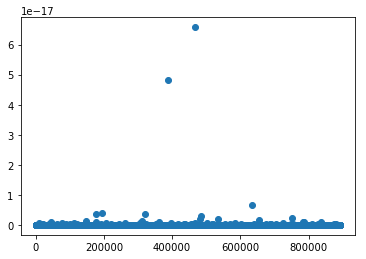

In [28]:
plt.plot(predics,'o')
plt.show()

In [29]:
test['predic'] = predics

In [30]:
test[['id','predic']].to_csv('perceptron.csv', index = False)

### Does worse than random! 

# Let's add some layers

In [31]:
model = Sequential()
model.add(Dense(5, input_dim = 51, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dropout(0.3))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dense(30, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dense(10, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dropout(0.3))
model.add(Dense(1, activation = 'sigmoid'))



In [32]:
optimizer = keras.optimizers.adam(lr=0.005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [230]:
model.fit(X,Y, validation_split=0.3, epochs = 1500, batch_size=10000)

Train on 416110 samples, validate on 178334 samples
Epoch 1/1500
416110/416110 [==============================] - 3s - loss: 0.9009 - acc: 0.1869 - val_loss: 0.6100 - val_acc: 0.9635
Epoch 2/1500
416110/416110 [==============================] - 1s - loss: 0.4800 - acc: 0.9637 - val_loss: 0.3798 - val_acc: 0.9635
Epoch 3/1500
416110/416110 [==============================] - 1s - loss: 0.3207 - acc: 0.9637 - val_loss: 0.2702 - val_acc: 0.9635
Epoch 4/1500
416110/416110 [==============================] - 1s - loss: 0.2409 - acc: 0.9637 - val_loss: 0.2173 - val_acc: 0.9635
Epoch 5/1500
416110/416110 [==============================] - 1s - loss: 0.2030 - acc: 0.9637 - val_loss: 0.1915 - val_acc: 0.9635
Epoch 6/1500
416110/416110 [==============================] - 1s - loss: 0.1837 - acc: 0.9637 - val_loss: 0.1777 - val_acc: 0.9635
Epoch 7/1500
416110/416110 [==============================] - 1s - loss: 0.1730 - acc: 0.9637 - val_loss: 0.1697 - val_acc: 0.9635
Epoch 8/1500
416110/416110 [===

KeyboardInterrupt: 

In [217]:
predics = model.predict(X_test)

In [218]:
test['predic'] = predics
test[['id','predic']].to_csv('2layer.csv', index = False)

## We get a score of 0.211. 

One issue is that we are passing categorical variables as is, however we should use some kind of one-hot encoding or other equivalent methods before passing it to the nerual network. 


### Repeating the experiments with only continuous variables! We will get to handling categorical/ordinal in the next notebook

In [300]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [301]:
train = train.drop(skip_columns, axis = 1)
test = test.drop(skip_columns, axis = 1)

In [302]:
rows_drop = train[(train.T==-1).sum()!=0].index.tolist()
train = train.drop(rows_drop, axis = 0)

In [303]:
continuous = [col for col in train.columns if 'bin' not in col and 'cat' not in col]
train = train[continuous]
continuous = [col for col in test.columns if 'bin' not in col and 'cat' not in col]
test = test[continuous]

In [304]:
X = train.drop(['id','target'], axis = 1).as_matrix()
Y = train['target'].as_matrix()

In [261]:
X.shape

(594444, 24)

In [316]:
model = Sequential()
model.add(Dense(10, input_dim = 24, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(10, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dense(5, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [321]:
optimizer = keras.optimizers.adagrad(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [322]:
model.fit(X,Y, validation_split=0.3, epochs = 1500)

Train on 416110 samples, validate on 178334 samples
Epoch 1/1500
416110/416110 [==============================] - 2s - loss: 0.1542 - acc: 0.9637 - val_loss: 0.1549 - val_acc: 0.9635
Epoch 2/1500
416110/416110 [==============================] - 0s - loss: 0.1540 - acc: 0.9637 - val_loss: 0.1549 - val_acc: 0.9635
Epoch 3/1500
416110/416110 [==============================] - 0s - loss: 0.1539 - acc: 0.9637 - val_loss: 0.1550 - val_acc: 0.9635
Epoch 4/1500
416110/416110 [==============================] - 0s - loss: 0.1539 - acc: 0.9637 - val_loss: 0.1549 - val_acc: 0.9635
Epoch 5/1500
416110/416110 [==============================] - 0s - loss: 0.1539 - acc: 0.9637 - val_loss: 0.1549 - val_acc: 0.9635
Epoch 6/1500
416110/416110 [==============================] - 0s - loss: 0.1539 - acc: 0.9637 - val_loss: 0.1549 - val_acc: 0.9635
Epoch 7/1500
416110/416110 [==============================] - 0s - loss: 0.1539 - acc: 0.9637 - val_loss: 0.1549 - val_acc: 0.9635
Epoch 8/1500
416110/416110 [===

416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 124/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 125/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 126/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 127/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 128/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 129/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 130/1500
416110/416110 [==============================] - 0s - loss: 0.1538 - 

416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 246/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 247/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 248/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 249/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 250/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 251/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1548 - val_acc: 0.9635
Epoch 252/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - 

416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 368/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 369/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 370/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 371/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 372/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 373/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 374/1500
416110/416110 [==============================] - 0s - loss: 0.1537 - 

416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 490/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 491/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 492/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 493/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 494/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 495/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 496/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - 

416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 612/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 613/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 614/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 615/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 616/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 617/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 618/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - 

416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 734/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 735/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 736/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 737/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 738/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 739/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 740/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - 

416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 856/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 857/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 858/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 859/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 860/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 861/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 862/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - 

416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 978/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 979/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 980/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 981/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 982/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 983/1500
416110/416110 [==============================] - 1s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.96350
Epoch 984/1500
416110/416110 [==============================] - 1s - loss: 0.1536 -

416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1039/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1040/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1041/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1042/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1043/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1044/1500
416110/416110 [==============================] - 0s - loss: 0.1536 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1045/1500
416110/416110 [==============================] - 0s - loss: 0.

416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1161/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1162/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1163/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1164/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1165/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1166/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1167/1500
416110/416110 [==============================] - 0s - loss: 0.

416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1283/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1284/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1285/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1286/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1287/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1288/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1289/1500
416110/416110 [==============================] - 1s - loss: 0.

416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1405/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1406/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1407/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1408/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1409/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1410/1500
416110/416110 [==============================] - 0s - loss: 0.1535 - acc: 0.9637 - val_loss: 0.1547 - val_acc: 0.9635
Epoch 1411/1500
416110/416110 [==============================] - 0s - loss: 0.

In [323]:
X_test = test.drop(['id'], axis = 1).as_matrix()
predics = model.predict(X_test)

In [324]:
test['target'] = predics
test[['id','target']].to_csv('SNN_cont.csv', index = False)
test = test.drop(['target'], axis = 1)

### We get a lower error than previously but the score is much worse....this means we are overfitting with 100 nodes in the hidden layer.
Repeating the experiment with just 10 neurons in the hidden layer, and adding one additional layer (2 hidden layers)

The best score we get using this 0.200. Probably we need to add categorical features etc. to get better results...

Update - Another thing we should try before adding additional data (~categorical) is to give the neural network more balanced data (compared to ~95% 0's and 5% 1's that we are giving it right now)

In [348]:

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train = train.drop(skip_columns, axis = 1)
test = test.drop(skip_columns, axis = 1)

rows_drop = train[(train.T==-1).sum()!=0].index.tolist()
train = train.drop(rows_drop, axis = 0)

continuous = [col for col in train.columns if 'bin' not in col and 'cat' not in col]
train = train[continuous]
continuous = [col for col in test.columns if 'bin' not in col and 'cat' not in col]
test = test[continuous]

In [340]:
no_ones = train[train['target'] == 1].shape[0]
p = 3
train = train[train['target'] == 0].sample(n = p*no_ones).append(train[train['target'] == 1]) 

In [341]:
X = train.drop(['id','target'], axis = 1).as_matrix()
Y = train['target'].as_matrix()
X_test = test.drop(['id'], axis = 1).as_matrix()

In [364]:
model = Sequential()
model.add(Dense(25, input_dim = 24, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(20, kernel_initializer = 'uniform', activation = 'sigmoid'))
#model.add(Dense(5, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [365]:
optimizer = keras.optimizers.adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [366]:
model.fit(X,Y, validation_split=0.2, epochs = 10000, batch_size=1000)

Train on 34595 samples, validate on 8649 samples
Epoch 1/10000
34595/34595 [==============================] - 2s - loss: 0.6637 - acc: 0.6250 - val_loss: 0.9870 - val_acc: 0.0000e+00
Epoch 2/10000
34595/34595 [==============================] - 0s - loss: 0.6597 - acc: 0.6250 - val_loss: 0.9819 - val_acc: 0.0000e+00
Epoch 3/10000
34595/34595 [==============================] - 0s - loss: 0.6560 - acc: 0.6250 - val_loss: 0.9346 - val_acc: 0.0000e+00
Epoch 4/10000
34595/34595 [==============================] - 0s - loss: 0.6534 - acc: 0.6250 - val_loss: 0.9625 - val_acc: 0.0000e+00
Epoch 5/10000
34595/34595 [==============================] - 0s - loss: 0.6522 - acc: 0.6254 - val_loss: 0.9606 - val_acc: 0.0000e+00
Epoch 6/10000
34595/34595 [==============================] - 0s - loss: 0.6539 - acc: 0.6254 - val_loss: 1.0004 - val_acc: 0.0000e+00
Epoch 7/10000
34595/34595 [==============================] - 0s - loss: 0.6507 - acc: 0.6253 - val_loss: 0.9555 - val_acc: 0.0281
Epoch 8/10000
345

34595/34595 [==============================] - 0s - loss: 0.6441 - acc: 0.6345 - val_loss: 1.0863 - val_acc: 0.0479
Epoch 125/10000
34595/34595 [==============================] - 0s - loss: 0.6439 - acc: 0.6338 - val_loss: 1.0488 - val_acc: 0.0599
Epoch 126/10000
34595/34595 [==============================] - 0s - loss: 0.6437 - acc: 0.6336 - val_loss: 1.0318 - val_acc: 0.0647
Epoch 127/10000
34595/34595 [==============================] - 0s - loss: 0.6440 - acc: 0.6334 - val_loss: 0.9115 - val_acc: 0.1318
Epoch 128/10000
34595/34595 [==============================] - 0s - loss: 0.6441 - acc: 0.6338 - val_loss: 0.9245 - val_acc: 0.1302
Epoch 129/10000
34595/34595 [==============================] - 0s - loss: 0.6447 - acc: 0.6326 - val_loss: 0.8931 - val_acc: 0.1746
Epoch 130/10000
34595/34595 [==============================] - 0s - loss: 0.6437 - acc: 0.6327 - val_loss: 0.8853 - val_acc: 0.2083
Epoch 131/10000
34595/34595 [==============================] - 0s - loss: 0.6445 - acc: 0.63

34595/34595 [==============================] - 0s - loss: 0.6401 - acc: 0.6408 - val_loss: 0.8968 - val_acc: 0.2244
Epoch 248/10000
34595/34595 [==============================] - 0s - loss: 0.6408 - acc: 0.6389 - val_loss: 0.9501 - val_acc: 0.1828
Epoch 249/10000
34595/34595 [==============================] - 0s - loss: 0.6405 - acc: 0.6386 - val_loss: 0.9790 - val_acc: 0.1661
Epoch 250/10000
34595/34595 [==============================] - 0s - loss: 0.6402 - acc: 0.6393 - val_loss: 0.9494 - val_acc: 0.1778
Epoch 251/10000
34595/34595 [==============================] - 0s - loss: 0.6408 - acc: 0.6387 - val_loss: 0.9275 - val_acc: 0.1830
Epoch 252/10000
34595/34595 [==============================] - 0s - loss: 0.6399 - acc: 0.6396 - val_loss: 0.9209 - val_acc: 0.2100
Epoch 253/10000
34595/34595 [==============================] - 0s - loss: 0.6405 - acc: 0.6391 - val_loss: 0.9787 - val_acc: 0.1532
Epoch 254/10000
34595/34595 [==============================] - 0s - loss: 0.6407 - acc: 0.63

34595/34595 [==============================] - 0s - loss: 0.6387 - acc: 0.6416 - val_loss: 0.9634 - val_acc: 0.1539
Epoch 372/10000
34595/34595 [==============================] - 0s - loss: 0.6389 - acc: 0.6417 - val_loss: 0.9836 - val_acc: 0.1498
Epoch 373/10000
34595/34595 [==============================] - 0s - loss: 0.6388 - acc: 0.6423 - val_loss: 0.9239 - val_acc: 0.1979
Epoch 374/10000
34595/34595 [==============================] - 0s - loss: 0.6392 - acc: 0.6397 - val_loss: 0.9579 - val_acc: 0.1653
Epoch 375/10000
34595/34595 [==============================] - 0s - loss: 0.6387 - acc: 0.6409 - val_loss: 0.9769 - val_acc: 0.1593
Epoch 376/10000
34595/34595 [==============================] - 0s - loss: 0.6385 - acc: 0.6407 - val_loss: 0.9967 - val_acc: 0.1446
Epoch 377/10000
34595/34595 [==============================] - 0s - loss: 0.6391 - acc: 0.6402 - val_loss: 0.9583 - val_acc: 0.1978
Epoch 378/10000
34595/34595 [==============================] - 0s - loss: 0.6386 - acc: 0.64

34595/34595 [==============================] - 0s - loss: 0.6373 - acc: 0.6435 - val_loss: 0.9637 - val_acc: 0.1512
Epoch 496/10000
34595/34595 [==============================] - 0s - loss: 0.6366 - acc: 0.6425 - val_loss: 1.0306 - val_acc: 0.1270
Epoch 497/10000
34595/34595 [==============================] - 0s - loss: 0.6374 - acc: 0.6424 - val_loss: 0.9476 - val_acc: 0.1918
Epoch 498/10000
34595/34595 [==============================] - 0s - loss: 0.6374 - acc: 0.6423 - val_loss: 0.9558 - val_acc: 0.1675
Epoch 499/10000
34595/34595 [==============================] - 0s - loss: 0.6375 - acc: 0.6426 - val_loss: 0.9464 - val_acc: 0.1689
Epoch 500/10000
34595/34595 [==============================] - 0s - loss: 0.6373 - acc: 0.6423 - val_loss: 1.0063 - val_acc: 0.1460
Epoch 501/10000
34595/34595 [==============================] - 0s - loss: 0.6377 - acc: 0.6416 - val_loss: 1.0483 - val_acc: 0.1206
Epoch 502/10000
34595/34595 [==============================] - 0s - loss: 0.6375 - acc: 0.64

34595/34595 [==============================] - 0s - loss: 0.6350 - acc: 0.6445 - val_loss: 0.9354 - val_acc: 0.2013
Epoch 620/10000
34595/34595 [==============================] - 0s - loss: 0.6349 - acc: 0.6437 - val_loss: 0.9738 - val_acc: 0.1665
Epoch 621/10000
34595/34595 [==============================] - 0s - loss: 0.6346 - acc: 0.6432 - val_loss: 0.9931 - val_acc: 0.1542
Epoch 622/10000
34595/34595 [==============================] - 0s - loss: 0.6347 - acc: 0.6447 - val_loss: 1.0141 - val_acc: 0.16220.64
Epoch 623/10000
34595/34595 [==============================] - 0s - loss: 0.6347 - acc: 0.6441 - val_loss: 1.0246 - val_acc: 0.1523
Epoch 624/10000
34595/34595 [==============================] - 0s - loss: 0.6353 - acc: 0.6432 - val_loss: 0.9690 - val_acc: 0.1734
Epoch 625/10000
34595/34595 [==============================] - 0s - loss: 0.6348 - acc: 0.6447 - val_loss: 0.9453 - val_acc: 0.1840
Epoch 626/10000
34595/34595 [==============================] - 0s - loss: 0.6352 - acc: 

34595/34595 [==============================] - 0s - loss: 0.6328 - acc: 0.6445 - val_loss: 0.9779 - val_acc: 0.1707
Epoch 743/10000
34595/34595 [==============================] - 0s - loss: 0.6321 - acc: 0.6453 - val_loss: 1.0434 - val_acc: 0.1399
Epoch 744/10000
34595/34595 [==============================] - 0s - loss: 0.6327 - acc: 0.6444 - val_loss: 0.9865 - val_acc: 0.1598
Epoch 745/10000
34595/34595 [==============================] - 0s - loss: 0.6319 - acc: 0.6447 - val_loss: 0.9934 - val_acc: 0.1666
Epoch 746/10000
34595/34595 [==============================] - 0s - loss: 0.6333 - acc: 0.6435 - val_loss: 0.9767 - val_acc: 0.1852
Epoch 747/10000
34595/34595 [==============================] - 0s - loss: 0.6325 - acc: 0.6443 - val_loss: 0.9811 - val_acc: 0.1741
Epoch 748/10000
34595/34595 [==============================] - 0s - loss: 0.6327 - acc: 0.6439 - val_loss: 0.9700 - val_acc: 0.1818
Epoch 749/10000
34595/34595 [==============================] - 0s - loss: 0.6322 - acc: 0.64

34595/34595 [==============================] - 0s - loss: 0.6322 - acc: 0.6447 - val_loss: 0.9534 - val_acc: 0.1901
Epoch 805/10000
34595/34595 [==============================] - 0s - loss: 0.6314 - acc: 0.6449 - val_loss: 0.9157 - val_acc: 0.2182
Epoch 806/10000
34595/34595 [==============================] - 0s - loss: 0.6318 - acc: 0.6447 - val_loss: 0.9847 - val_acc: 0.1569
Epoch 807/10000
34595/34595 [==============================] - 0s - loss: 0.6319 - acc: 0.6445 - val_loss: 1.0009 - val_acc: 0.1602
Epoch 808/10000
34595/34595 [==============================] - 0s - loss: 0.6315 - acc: 0.6453 - val_loss: 1.0004 - val_acc: 0.1596
Epoch 809/10000
34595/34595 [==============================] - 0s - loss: 0.6312 - acc: 0.6445 - val_loss: 0.9871 - val_acc: 0.1719
Epoch 810/10000
34595/34595 [==============================] - 0s - loss: 0.6316 - acc: 0.6438 - val_loss: 1.0021 - val_acc: 0.1634
Epoch 811/10000
34595/34595 [==============================] - 0s - loss: 0.6318 - acc: 0.64

34595/34595 [==============================] - 0s - loss: 0.6294 - acc: 0.6470 - val_loss: 0.9442 - val_acc: 0.2114
Epoch 928/10000
34595/34595 [==============================] - 0s - loss: 0.6295 - acc: 0.6454 - val_loss: 0.9825 - val_acc: 0.1754
Epoch 929/10000
34595/34595 [==============================] - 0s - loss: 0.6295 - acc: 0.6470 - val_loss: 1.0020 - val_acc: 0.1569
Epoch 930/10000
34595/34595 [==============================] - 0s - loss: 0.6295 - acc: 0.6452 - val_loss: 0.9678 - val_acc: 0.1877
Epoch 931/10000
34595/34595 [==============================] - 0s - loss: 0.6297 - acc: 0.6462 - val_loss: 1.0304 - val_acc: 0.1452
Epoch 932/10000
34595/34595 [==============================] - 0s - loss: 0.6298 - acc: 0.6454 - val_loss: 1.0112 - val_acc: 0.1608
Epoch 933/10000
34595/34595 [==============================] - 0s - loss: 0.6291 - acc: 0.6466 - val_loss: 0.9606 - val_acc: 0.1873
Epoch 934/10000
34595/34595 [==============================] - 0s - loss: 0.6294 - acc: 0.64

34595/34595 [==============================] - 0s - loss: 0.6277 - acc: 0.6470 - val_loss: 0.9925 - val_acc: 0.1689
Epoch 1051/10000
34595/34595 [==============================] - 0s - loss: 0.6278 - acc: 0.6473 - val_loss: 1.0149 - val_acc: 0.1649
Epoch 1052/10000
34595/34595 [==============================] - 0s - loss: 0.6286 - acc: 0.6468 - val_loss: 0.9706 - val_acc: 0.1837
Epoch 1053/10000
34595/34595 [==============================] - ETA: 0s - loss: 0.6280 - acc: 0.647 - 0s - loss: 0.6281 - acc: 0.6477 - val_loss: 0.9777 - val_acc: 0.1729
Epoch 1054/10000
34595/34595 [==============================] - 0s - loss: 0.6280 - acc: 0.6481 - val_loss: 0.9694 - val_acc: 0.1931
Epoch 1055/10000
34595/34595 [==============================] - 0s - loss: 0.6271 - acc: 0.6464 - val_loss: 0.9755 - val_acc: 0.1805
Epoch 1056/10000
34595/34595 [==============================] - 0s - loss: 0.6269 - acc: 0.6488 - val_loss: 0.9885 - val_acc: 0.1733
Epoch 1057/10000
34595/34595 [==================

34595/34595 [==============================] - 0s - loss: 0.6268 - acc: 0.6484 - val_loss: 0.9934 - val_acc: 0.1837
Epoch 1173/10000
34595/34595 [==============================] - 0s - loss: 0.6269 - acc: 0.6487 - val_loss: 0.9410 - val_acc: 0.2162
Epoch 1174/10000
34595/34595 [==============================] - 0s - loss: 0.6265 - acc: 0.6469 - val_loss: 0.9833 - val_acc: 0.1787
Epoch 1175/10000
34595/34595 [==============================] - 0s - loss: 0.6272 - acc: 0.6478 - val_loss: 0.9761 - val_acc: 0.1774
Epoch 1176/10000
34595/34595 [==============================] - 0s - loss: 0.6268 - acc: 0.6483 - val_loss: 1.0072 - val_acc: 0.1600
Epoch 1177/10000
34595/34595 [==============================] - 0s - loss: 0.6269 - acc: 0.6467 - val_loss: 0.9838 - val_acc: 0.1902
Epoch 1178/10000
34595/34595 [==============================] - 0s - loss: 0.6264 - acc: 0.6486 - val_loss: 0.9656 - val_acc: 0.1843
Epoch 1179/10000
34595/34595 [==============================] - 0s - loss: 0.6266 - ac

34595/34595 [==============================] - 0s - loss: 0.6262 - acc: 0.6480 - val_loss: 0.9941 - val_acc: 0.1826
Epoch 1295/10000
34595/34595 [==============================] - 0s - loss: 0.6259 - acc: 0.6481 - val_loss: 0.9623 - val_acc: 0.1798
Epoch 1296/10000
34595/34595 [==============================] - 0s - loss: 0.6264 - acc: 0.6467 - val_loss: 0.9662 - val_acc: 0.1960
Epoch 1297/10000
34595/34595 [==============================] - 0s - loss: 0.6257 - acc: 0.6472 - val_loss: 1.0107 - val_acc: 0.1660
Epoch 1298/10000
34595/34595 [==============================] - 0s - loss: 0.6258 - acc: 0.6462 - val_loss: 1.0118 - val_acc: 0.1739
Epoch 1299/10000
34595/34595 [==============================] - 0s - loss: 0.6254 - acc: 0.6487 - val_loss: 1.0234 - val_acc: 0.1655
Epoch 1300/10000
34595/34595 [==============================] - 0s - loss: 0.6259 - acc: 0.6484 - val_loss: 0.9755 - val_acc: 0.1885
Epoch 1301/10000
34595/34595 [==============================] - 0s - loss: 0.6259 - ac

34595/34595 [==============================] - 0s - loss: 0.6240 - acc: 0.6493 - val_loss: 1.0264 - val_acc: 0.1593
Epoch 1417/10000
34595/34595 [==============================] - 0s - loss: 0.6252 - acc: 0.6488 - val_loss: 1.0123 - val_acc: 0.1709
Epoch 1418/10000
34595/34595 [==============================] - 0s - loss: 0.6239 - acc: 0.6491 - val_loss: 1.0239 - val_acc: 0.1636
Epoch 1419/10000
34595/34595 [==============================] - 0s - loss: 0.6239 - acc: 0.6502 - val_loss: 1.0167 - val_acc: 0.1799
Epoch 1420/10000
34595/34595 [==============================] - 0s - loss: 0.6253 - acc: 0.6494 - val_loss: 1.0261 - val_acc: 0.1611
Epoch 1421/10000
34595/34595 [==============================] - 0s - loss: 0.6253 - acc: 0.6476 - val_loss: 0.9604 - val_acc: 0.2046
Epoch 1422/10000
34595/34595 [==============================] - 0s - loss: 0.6245 - acc: 0.6493 - val_loss: 0.9739 - val_acc: 0.1954
Epoch 1423/10000
34595/34595 [==============================] - 0s - loss: 0.6248 - ac

34595/34595 [==============================] - 0s - loss: 0.6226 - acc: 0.6511 - val_loss: 1.0142 - val_acc: 0.1771
Epoch 1539/10000
34595/34595 [==============================] - 0s - loss: 0.6225 - acc: 0.6505 - val_loss: 1.0259 - val_acc: 0.1701
Epoch 1540/10000
34595/34595 [==============================] - 0s - loss: 0.6227 - acc: 0.6500 - val_loss: 1.0242 - val_acc: 0.1800
Epoch 1541/10000
34595/34595 [==============================] - 0s - loss: 0.6245 - acc: 0.6486 - val_loss: 0.9974 - val_acc: 0.1897
Epoch 1542/10000
34595/34595 [==============================] - 0s - loss: 0.6229 - acc: 0.6499 - val_loss: 1.0332 - val_acc: 0.1753
Epoch 1543/10000
34595/34595 [==============================] - 0s - loss: 0.6226 - acc: 0.6498 - val_loss: 1.0239 - val_acc: 0.1797
Epoch 1544/10000
34595/34595 [==============================] - 0s - loss: 0.6225 - acc: 0.6502 - val_loss: 0.9862 - val_acc: 0.1917
Epoch 1545/10000
34595/34595 [==============================] - 0s - loss: 0.6229 - ac

34595/34595 [==============================] - 0s - loss: 0.6229 - acc: 0.6483 - val_loss: 1.0359 - val_acc: 0.1526
Epoch 1661/10000
34595/34595 [==============================] - 0s - loss: 0.6225 - acc: 0.6510 - val_loss: 0.9968 - val_acc: 0.1924
Epoch 1662/10000
34595/34595 [==============================] - 0s - loss: 0.6239 - acc: 0.6499 - val_loss: 0.9609 - val_acc: 0.2022
Epoch 1663/10000
34595/34595 [==============================] - 0s - loss: 0.6227 - acc: 0.6506 - val_loss: 1.0058 - val_acc: 0.1888
Epoch 1664/10000
34595/34595 [==============================] - 0s - loss: 0.6219 - acc: 0.6511 - val_loss: 1.0045 - val_acc: 0.1764
Epoch 1665/10000
34595/34595 [==============================] - 0s - loss: 0.6229 - acc: 0.6499 - val_loss: 1.0346 - val_acc: 0.1634
Epoch 1666/10000
34595/34595 [==============================] - 0s - loss: 0.6224 - acc: 0.6499 - val_loss: 0.9804 - val_acc: 0.1967
Epoch 1667/10000
34595/34595 [==============================] - 0s - loss: 0.6232 - ac

34595/34595 [==============================] - 0s - loss: 0.6218 - acc: 0.6509 - val_loss: 1.0241 - val_acc: 0.1784
Epoch 1783/10000
34595/34595 [==============================] - 0s - loss: 0.6206 - acc: 0.6510 - val_loss: 0.9916 - val_acc: 0.1905
Epoch 1784/10000
34595/34595 [==============================] - 0s - loss: 0.6216 - acc: 0.6498 - val_loss: 1.0001 - val_acc: 0.1842
Epoch 1785/10000
34595/34595 [==============================] - 0s - loss: 0.6208 - acc: 0.6506 - val_loss: 1.0023 - val_acc: 0.1900
Epoch 1786/10000
34595/34595 [==============================] - 0s - loss: 0.6212 - acc: 0.6524 - val_loss: 0.9837 - val_acc: 0.1885
Epoch 1787/10000
34595/34595 [==============================] - 0s - loss: 0.6212 - acc: 0.6515 - val_loss: 1.0410 - val_acc: 0.1629
Epoch 1788/10000
34595/34595 [==============================] - 0s - loss: 0.6214 - acc: 0.6505 - val_loss: 1.0857 - val_acc: 0.1452
Epoch 1789/10000
34595/34595 [==============================] - 0s - loss: 0.6224 - ac

34595/34595 [==============================] - 0s - loss: 0.6195 - acc: 0.6524 - val_loss: 1.0169 - val_acc: 0.1807
Epoch 1905/10000
34595/34595 [==============================] - 0s - loss: 0.6194 - acc: 0.6533 - val_loss: 0.9900 - val_acc: 0.1857
Epoch 1906/10000
34595/34595 [==============================] - 0s - loss: 0.6199 - acc: 0.6533 - val_loss: 0.9983 - val_acc: 0.1819
Epoch 1907/10000
34595/34595 [==============================] - 0s - loss: 0.6193 - acc: 0.6523 - val_loss: 0.9998 - val_acc: 0.1880
Epoch 1908/10000
34595/34595 [==============================] - 0s - loss: 0.6200 - acc: 0.6518 - val_loss: 0.9886 - val_acc: 0.2036
Epoch 1909/10000
34595/34595 [==============================] - 0s - loss: 0.6198 - acc: 0.6527 - val_loss: 1.0245 - val_acc: 0.1741
Epoch 1910/10000
34595/34595 [==============================] - 0s - loss: 0.6192 - acc: 0.6531 - val_loss: 1.0458 - val_acc: 0.1648
Epoch 1911/10000
34595/34595 [==============================] - 0s - loss: 0.6190 - ac

34595/34595 [==============================] - 0s - loss: 0.6230 - acc: 0.6523 - val_loss: 1.0006 - val_acc: 0.1890
Epoch 2027/10000
34595/34595 [==============================] - 0s - loss: 0.6229 - acc: 0.6516 - val_loss: 0.9941 - val_acc: 0.1915
Epoch 2028/10000
34595/34595 [==============================] - 0s - loss: 0.6226 - acc: 0.6511 - val_loss: 1.0232 - val_acc: 0.1859
Epoch 2029/10000
34595/34595 [==============================] - 0s - loss: 0.6199 - acc: 0.6522 - val_loss: 1.0615 - val_acc: 0.1415
Epoch 2030/10000
34595/34595 [==============================] - 0s - loss: 0.6202 - acc: 0.6523 - val_loss: 1.0559 - val_acc: 0.1519
Epoch 2031/10000
34595/34595 [==============================] - 0s - loss: 0.6190 - acc: 0.6536 - val_loss: 1.0160 - val_acc: 0.1695
Epoch 2032/10000
34595/34595 [==============================] - 0s - loss: 0.6221 - acc: 0.6524 - val_loss: 1.0120 - val_acc: 0.1791
Epoch 2033/10000
34595/34595 [==============================] - 0s - loss: 0.6186 - ac

34595/34595 [==============================] - 0s - loss: 0.6160 - acc: 0.6556 - val_loss: 1.0210 - val_acc: 0.1856
Epoch 2149/10000
34595/34595 [==============================] - 0s - loss: 0.6166 - acc: 0.6546 - val_loss: 1.0150 - val_acc: 0.1870
Epoch 2150/10000
34595/34595 [==============================] - 0s - loss: 0.6174 - acc: 0.6539 - val_loss: 1.0376 - val_acc: 0.1774
Epoch 2151/10000
34595/34595 [==============================] - 0s - loss: 0.6168 - acc: 0.6538 - val_loss: 1.0422 - val_acc: 0.1658
Epoch 2152/10000
34595/34595 [==============================] - 0s - loss: 0.6163 - acc: 0.6551 - val_loss: 1.0385 - val_acc: 0.1741
Epoch 2153/10000
34595/34595 [==============================] - 0s - loss: 0.6170 - acc: 0.6540 - val_loss: 1.0670 - val_acc: 0.1565
Epoch 2154/10000
34595/34595 [==============================] - 0s - loss: 0.6168 - acc: 0.6549 - val_loss: 1.0212 - val_acc: 0.1836
Epoch 2155/10000
34595/34595 [==============================] - 0s - loss: 0.6168 - ac

34595/34595 [==============================] - 0s - loss: 0.6161 - acc: 0.6552 - val_loss: 1.0063 - val_acc: 0.1927
Epoch 2271/10000
34595/34595 [==============================] - 0s - loss: 0.6169 - acc: 0.6554 - val_loss: 0.9904 - val_acc: 0.2007
Epoch 2272/10000
34595/34595 [==============================] - 0s - loss: 0.6166 - acc: 0.6547 - val_loss: 1.0163 - val_acc: 0.1905
Epoch 2273/10000
34595/34595 [==============================] - 0s - loss: 0.6165 - acc: 0.6547 - val_loss: 1.0221 - val_acc: 0.1771
Epoch 2274/10000
34595/34595 [==============================] - 0s - loss: 0.6164 - acc: 0.6561 - val_loss: 1.0026 - val_acc: 0.1959
Epoch 2275/10000
34595/34595 [==============================] - 0s - loss: 0.6152 - acc: 0.6561 - val_loss: 1.0397 - val_acc: 0.1696
Epoch 2276/10000
34595/34595 [==============================] - 0s - loss: 0.6161 - acc: 0.6565 - val_loss: 1.0568 - val_acc: 0.1633
Epoch 2277/10000
34595/34595 [==============================] - 0s - loss: 0.6184 - ac

34595/34595 [==============================] - 0s - loss: 0.6159 - acc: 0.6563 - val_loss: 1.0110 - val_acc: 0.1866
Epoch 2393/10000
34595/34595 [==============================] - 0s - loss: 0.6163 - acc: 0.6552 - val_loss: 1.0490 - val_acc: 0.1622
Epoch 2394/10000
34595/34595 [==============================] - 0s - loss: 0.6160 - acc: 0.6548 - val_loss: 1.0136 - val_acc: 0.1990
Epoch 2395/10000
34595/34595 [==============================] - 0s - loss: 0.6192 - acc: 0.6528 - val_loss: 0.9930 - val_acc: 0.2049
Epoch 2396/10000
34595/34595 [==============================] - 0s - loss: 0.6155 - acc: 0.6575 - val_loss: 1.0357 - val_acc: 0.1799
Epoch 2397/10000
34595/34595 [==============================] - 0s - loss: 0.6164 - acc: 0.6558 - val_loss: 1.0237 - val_acc: 0.1836
Epoch 2398/10000
34595/34595 [==============================] - 0s - loss: 0.6156 - acc: 0.6553 - val_loss: 1.0364 - val_acc: 0.1747
Epoch 2399/10000
34595/34595 [==============================] - 0s - loss: 0.6152 - ac

34595/34595 [==============================] - 0s - loss: 0.6186 - acc: 0.6550 - val_loss: 1.0475 - val_acc: 0.1707
Epoch 2515/10000
34595/34595 [==============================] - 0s - loss: 0.6195 - acc: 0.6540 - val_loss: 1.0500 - val_acc: 0.1730
Epoch 2516/10000
34595/34595 [==============================] - 0s - loss: 0.6180 - acc: 0.6550 - val_loss: 0.9985 - val_acc: 0.1927
Epoch 2517/10000
34595/34595 [==============================] - 0s - loss: 0.6189 - acc: 0.6541 - val_loss: 1.0451 - val_acc: 0.1587
Epoch 2518/10000
34595/34595 [==============================] - 0s - loss: 0.6190 - acc: 0.6555 - val_loss: 1.0450 - val_acc: 0.1586
Epoch 2519/10000
34595/34595 [==============================] - 0s - loss: 0.6174 - acc: 0.6555 - val_loss: 0.9966 - val_acc: 0.1953
Epoch 2520/10000
34595/34595 [==============================] - 0s - loss: 0.6167 - acc: 0.6565 - val_loss: 1.0494 - val_acc: 0.1688
Epoch 2521/10000
34595/34595 [==============================] - 0s - loss: 0.6167 - ac

34595/34595 [==============================] - 0s - loss: 0.6197 - acc: 0.6548 - val_loss: 1.0455 - val_acc: 0.1644
Epoch 2637/10000
34595/34595 [==============================] - 0s - loss: 0.6201 - acc: 0.6555 - val_loss: 0.9870 - val_acc: 0.2015
Epoch 2638/10000
34595/34595 [==============================] - 0s - loss: 0.6219 - acc: 0.6554 - val_loss: 1.0205 - val_acc: 0.1828
Epoch 2639/10000
34595/34595 [==============================] - 0s - loss: 0.6219 - acc: 0.6535 - val_loss: 1.0221 - val_acc: 0.1807
Epoch 2640/10000
34595/34595 [==============================] - 0s - loss: 0.6158 - acc: 0.6568 - val_loss: 1.0151 - val_acc: 0.1904
Epoch 2641/10000
34595/34595 [==============================] - 0s - loss: 0.6150 - acc: 0.6570 - val_loss: 1.0760 - val_acc: 0.1550
Epoch 2642/10000
34595/34595 [==============================] - 0s - loss: 0.6149 - acc: 0.6571 - val_loss: 1.0447 - val_acc: 0.1776
Epoch 2643/10000
34595/34595 [==============================] - 0s - loss: 0.6158 - ac

34595/34595 [==============================] - 0s - loss: 0.6154 - acc: 0.6563 - val_loss: 1.0564 - val_acc: 0.1676
Epoch 2759/10000
34595/34595 [==============================] - 0s - loss: 0.6194 - acc: 0.6542 - val_loss: 1.0114 - val_acc: 0.2006
Epoch 2760/10000
34595/34595 [==============================] - 0s - loss: 0.6159 - acc: 0.6563 - val_loss: 1.0090 - val_acc: 0.1898
Epoch 2761/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6556 - val_loss: 1.0513 - val_acc: 0.1681
Epoch 2762/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6574 - val_loss: 1.0420 - val_acc: 0.1737
Epoch 2763/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6582 - val_loss: 1.0575 - val_acc: 0.1746
Epoch 2764/10000
34595/34595 [==============================] - 0s - loss: 0.6140 - acc: 0.6567 - val_loss: 1.0377 - val_acc: 0.1814
Epoch 2765/10000
34595/34595 [==============================] - 0s - loss: 0.6135 - ac

34595/34595 [==============================] - 0s - loss: 0.6164 - acc: 0.6564 - val_loss: 1.0353 - val_acc: 0.1746
Epoch 2881/10000
34595/34595 [==============================] - 0s - loss: 0.6160 - acc: 0.6568 - val_loss: 1.0192 - val_acc: 0.1867
Epoch 2882/10000
34595/34595 [==============================] - 0s - loss: 0.6156 - acc: 0.6573 - val_loss: 1.0304 - val_acc: 0.1713
Epoch 2883/10000
34595/34595 [==============================] - 0s - loss: 0.6148 - acc: 0.6561 - val_loss: 1.0441 - val_acc: 0.1718
Epoch 2884/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6578 - val_loss: 1.0522 - val_acc: 0.1663
Epoch 2885/10000
34595/34595 [==============================] - 0s - loss: 0.6152 - acc: 0.6568 - val_loss: 1.0171 - val_acc: 0.1799
Epoch 2886/10000
34595/34595 [==============================] - 0s - loss: 0.6158 - acc: 0.6566 - val_loss: 0.9989 - val_acc: 0.1882
Epoch 2887/10000
34595/34595 [==============================] - 0s - loss: 0.6151 - ac

34595/34595 [==============================] - 0s - loss: 0.6189 - acc: 0.6561 - val_loss: 1.0119 - val_acc: 0.1708
Epoch 3003/10000
34595/34595 [==============================] - 0s - loss: 0.6169 - acc: 0.6567 - val_loss: 1.0195 - val_acc: 0.1783
Epoch 3004/10000
34595/34595 [==============================] - 0s - loss: 0.6166 - acc: 0.6563 - val_loss: 1.0427 - val_acc: 0.1635
Epoch 3005/10000
34595/34595 [==============================] - 0s - loss: 0.6180 - acc: 0.6557 - val_loss: 1.0365 - val_acc: 0.1740
Epoch 3006/10000
34595/34595 [==============================] - 0s - loss: 0.6169 - acc: 0.6557 - val_loss: 1.0341 - val_acc: 0.1744
Epoch 3007/10000
34595/34595 [==============================] - 0s - loss: 0.6162 - acc: 0.6565 - val_loss: 1.0378 - val_acc: 0.1739
Epoch 3008/10000
34595/34595 [==============================] - 0s - loss: 0.6167 - acc: 0.6558 - val_loss: 1.0398 - val_acc: 0.1584
Epoch 3009/10000
34595/34595 [==============================] - 0s - loss: 0.6174 - ac

34595/34595 [==============================] - 0s - loss: 0.6167 - acc: 0.6573 - val_loss: 1.0139 - val_acc: 0.1796
Epoch 3125/10000
34595/34595 [==============================] - 0s - loss: 0.6179 - acc: 0.6566 - val_loss: 1.0270 - val_acc: 0.1692
Epoch 3126/10000
34595/34595 [==============================] - 0s - loss: 0.6164 - acc: 0.6572 - val_loss: 1.0295 - val_acc: 0.1769
Epoch 3127/10000
34595/34595 [==============================] - 0s - loss: 0.6164 - acc: 0.6564 - val_loss: 1.0083 - val_acc: 0.1848
Epoch 3128/10000
34595/34595 [==============================] - 0s - loss: 0.6167 - acc: 0.6556 - val_loss: 1.0183 - val_acc: 0.1868
Epoch 3129/10000
34595/34595 [==============================] - 0s - loss: 0.6179 - acc: 0.6559 - val_loss: 0.9985 - val_acc: 0.1803
Epoch 3130/10000
34595/34595 [==============================] - 0s - loss: 0.6176 - acc: 0.6567 - val_loss: 1.0324 - val_acc: 0.1666
Epoch 3131/10000
34595/34595 [==============================] - 0s - loss: 0.6166 - ac

34595/34595 [==============================] - 0s - loss: 0.6175 - acc: 0.6567 - val_loss: 1.0320 - val_acc: 0.1690
Epoch 3247/10000
34595/34595 [==============================] - 0s - loss: 0.6181 - acc: 0.6556 - val_loss: 1.0198 - val_acc: 0.1829
Epoch 3248/10000
34595/34595 [==============================] - 0s - loss: 0.6176 - acc: 0.6560 - val_loss: 1.0529 - val_acc: 0.1702
Epoch 3249/10000
34595/34595 [==============================] - 0s - loss: 0.6172 - acc: 0.6573 - val_loss: 1.0203 - val_acc: 0.1828
Epoch 3250/10000
34595/34595 [==============================] - 0s - loss: 0.6167 - acc: 0.6559 - val_loss: 1.0332 - val_acc: 0.1678
Epoch 3251/10000
34595/34595 [==============================] - 0s - loss: 0.6163 - acc: 0.6567 - val_loss: 1.0429 - val_acc: 0.1694
Epoch 3252/10000
34595/34595 [==============================] - 0s - loss: 0.6176 - acc: 0.6557 - val_loss: 1.0148 - val_acc: 0.1917
Epoch 3253/10000
34595/34595 [==============================] - 0s - loss: 0.6157 - ac

34595/34595 [==============================] - 0s - loss: 0.6169 - acc: 0.6580 - val_loss: 0.9915 - val_acc: 0.1941
Epoch 3369/10000
34595/34595 [==============================] - 0s - loss: 0.6166 - acc: 0.6577 - val_loss: 1.0379 - val_acc: 0.1635
Epoch 3370/10000
34595/34595 [==============================] - 0s - loss: 0.6164 - acc: 0.6573 - val_loss: 1.0133 - val_acc: 0.1909
Epoch 3371/10000
34595/34595 [==============================] - 0s - loss: 0.6162 - acc: 0.6576 - val_loss: 1.0068 - val_acc: 0.1915
Epoch 3372/10000
34595/34595 [==============================] - 0s - loss: 0.6161 - acc: 0.6582 - val_loss: 1.0199 - val_acc: 0.1900
Epoch 3373/10000
34595/34595 [==============================] - 0s - loss: 0.6150 - acc: 0.6591 - val_loss: 1.0192 - val_acc: 0.1814
Epoch 3374/10000
34595/34595 [==============================] - 0s - loss: 0.6150 - acc: 0.6581 - val_loss: 1.0467 - val_acc: 0.1722
Epoch 3375/10000
34595/34595 [==============================] - 0s - loss: 0.6154 - ac

34595/34595 [==============================] - 0s - loss: 0.6159 - acc: 0.6570 - val_loss: 1.0060 - val_acc: 0.1868
Epoch 3491/10000
34595/34595 [==============================] - 0s - loss: 0.6163 - acc: 0.6581 - val_loss: 1.0056 - val_acc: 0.1986
Epoch 3492/10000
34595/34595 [==============================] - 0s - loss: 0.6174 - acc: 0.6568 - val_loss: 0.9905 - val_acc: 0.2025
Epoch 3493/10000
34595/34595 [==============================] - 0s - loss: 0.6157 - acc: 0.6577 - val_loss: 1.0041 - val_acc: 0.1940
Epoch 3494/10000
34595/34595 [==============================] - 0s - loss: 0.6150 - acc: 0.6574 - val_loss: 0.9933 - val_acc: 0.1954
Epoch 3495/10000
34595/34595 [==============================] - 0s - loss: 0.6160 - acc: 0.6570 - val_loss: 1.0194 - val_acc: 0.1782
Epoch 3496/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6581 - val_loss: 1.0087 - val_acc: 0.1881
Epoch 3497/10000
34595/34595 [==============================] - 0s - loss: 0.6152 - ac

34595/34595 [==============================] - 0s - loss: 0.6141 - acc: 0.6575 - val_loss: 1.0350 - val_acc: 0.1786
Epoch 3613/10000
34595/34595 [==============================] - 0s - loss: 0.6137 - acc: 0.6593 - val_loss: 0.9992 - val_acc: 0.2045
Epoch 3614/10000
34595/34595 [==============================] - 0s - loss: 0.6135 - acc: 0.6584 - val_loss: 1.0098 - val_acc: 0.1840
Epoch 3615/10000
34595/34595 [==============================] - 0s - loss: 0.6145 - acc: 0.6576 - val_loss: 1.0346 - val_acc: 0.1875
Epoch 3616/10000
34595/34595 [==============================] - 0s - loss: 0.6140 - acc: 0.6588 - val_loss: 1.0423 - val_acc: 0.1750
Epoch 3617/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6583 - val_loss: 1.0506 - val_acc: 0.1753
Epoch 3618/10000
34595/34595 [==============================] - 0s - loss: 0.6138 - acc: 0.6597 - val_loss: 1.0248 - val_acc: 0.1826
Epoch 3619/10000
34595/34595 [==============================] - 0s - loss: 0.6129 - ac

34595/34595 [==============================] - 0s - loss: 0.6129 - acc: 0.6589 - val_loss: 1.0254 - val_acc: 0.1838
Epoch 3735/10000
34595/34595 [==============================] - 0s - loss: 0.6148 - acc: 0.6572 - val_loss: 1.0331 - val_acc: 0.1808
Epoch 3736/10000
34595/34595 [==============================] - 0s - loss: 0.6148 - acc: 0.6574 - val_loss: 1.0678 - val_acc: 0.1656
Epoch 3737/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6584 - val_loss: 1.0643 - val_acc: 0.1725
Epoch 3738/10000
34595/34595 [==============================] - 0s - loss: 0.6129 - acc: 0.6588 - val_loss: 1.0350 - val_acc: 0.1843
Epoch 3739/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - acc: 0.6580 - val_loss: 1.0158 - val_acc: 0.1951
Epoch 3740/10000
34595/34595 [==============================] - 0s - loss: 0.6137 - acc: 0.6584 - val_loss: 1.0027 - val_acc: 0.1947
Epoch 3741/10000
34595/34595 [==============================] - 0s - loss: 0.6153 - ac

34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6597 - val_loss: 1.0312 - val_acc: 0.1894
Epoch 3857/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6569 - val_loss: 1.0142 - val_acc: 0.1848
Epoch 3858/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6587 - val_loss: 1.0191 - val_acc: 0.1860
Epoch 3859/10000
34595/34595 [==============================] - 0s - loss: 0.6122 - acc: 0.6588 - val_loss: 1.0562 - val_acc: 0.1755
Epoch 3860/10000
34595/34595 [==============================] - 0s - loss: 0.6136 - acc: 0.6591 - val_loss: 1.0274 - val_acc: 0.1907
Epoch 3861/10000
34595/34595 [==============================] - 0s - loss: 0.6154 - acc: 0.6591 - val_loss: 1.0435 - val_acc: 0.1813
Epoch 3862/10000
34595/34595 [==============================] - 0s - loss: 0.6137 - acc: 0.6580 - val_loss: 1.0270 - val_acc: 0.1887
Epoch 3863/10000
34595/34595 [==============================] - 0s - loss: 0.6127 - ac

34595/34595 [==============================] - 0s - loss: 0.6127 - acc: 0.6602 - val_loss: 1.0120 - val_acc: 0.2003
Epoch 3979/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6605 - val_loss: 1.0546 - val_acc: 0.1786
Epoch 3980/10000
34595/34595 [==============================] - 0s - loss: 0.6122 - acc: 0.6587 - val_loss: 0.9843 - val_acc: 0.2170
Epoch 3981/10000
34595/34595 [==============================] - 0s - loss: 0.6124 - acc: 0.6589 - val_loss: 1.0341 - val_acc: 0.1849
Epoch 3982/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6589 - val_loss: 1.0437 - val_acc: 0.1790
Epoch 3983/10000
34595/34595 [==============================] - 0s - loss: 0.6125 - acc: 0.6601 - val_loss: 0.9950 - val_acc: 0.2049
Epoch 3984/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6596 - val_loss: 0.9793 - val_acc: 0.2140
Epoch 3985/10000
34595/34595 [==============================] - 0s - loss: 0.6128 - ac

34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6598 - val_loss: 1.0331 - val_acc: 0.1881
Epoch 4101/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6587 - val_loss: 1.0598 - val_acc: 0.1746
Epoch 4102/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6604 - val_loss: 1.0487 - val_acc: 0.1735
Epoch 4103/10000
34595/34595 [==============================] - 0s - loss: 0.6124 - acc: 0.6595 - val_loss: 1.0451 - val_acc: 0.1849
Epoch 4104/10000
34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6595 - val_loss: 1.0019 - val_acc: 0.1977
Epoch 4105/10000
34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6606 - val_loss: 1.0364 - val_acc: 0.1870
Epoch 4106/10000
34595/34595 [==============================] - 0s - loss: 0.6127 - acc: 0.6605 - val_loss: 1.0418 - val_acc: 0.1784
Epoch 4107/10000
34595/34595 [==============================] - 0s - loss: 0.6138 - ac

34595/34595 [==============================] - 0s - loss: 0.6141 - acc: 0.6582 - val_loss: 1.0686 - val_acc: 0.1791
Epoch 4223/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6591 - val_loss: 1.0574 - val_acc: 0.1818
Epoch 4224/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6593 - val_loss: 1.0708 - val_acc: 0.1794
Epoch 4225/10000
34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6599 - val_loss: 1.0409 - val_acc: 0.1812
Epoch 4226/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6602 - val_loss: 1.0202 - val_acc: 0.1877
Epoch 4227/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6619 - val_loss: 1.0702 - val_acc: 0.1762
Epoch 4228/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6608 - val_loss: 1.0437 - val_acc: 0.1821
Epoch 4229/10000
34595/34595 [==============================] - 0s - loss: 0.6123 - ac

34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6610 - val_loss: 1.0761 - val_acc: 0.1730
Epoch 4284/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6593 - val_loss: 1.0904 - val_acc: 0.1652
Epoch 4285/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6595 - val_loss: 1.0044 - val_acc: 0.2087
Epoch 4286/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6612 - val_loss: 1.0221 - val_acc: 0.20370.661
Epoch 4287/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6603 - val_loss: 1.0474 - val_acc: 0.1798
Epoch 4288/10000
34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6597 - val_loss: 1.0208 - val_acc: 0.1961
Epoch 4289/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6600 - val_loss: 1.0427 - val_acc: 0.1887
Epoch 4290/10000
34595/34595 [==============================] - 0s - loss: 0.6109

34595/34595 [==============================] - 0s - loss: 0.6146 - acc: 0.6577 - val_loss: 1.0271 - val_acc: 0.1985
Epoch 4406/10000
34595/34595 [==============================] - 0s - loss: 0.6141 - acc: 0.6585 - val_loss: 1.0426 - val_acc: 0.1886
Epoch 4407/10000
34595/34595 [==============================] - 0s - loss: 0.6149 - acc: 0.6581 - val_loss: 1.0511 - val_acc: 0.1836
Epoch 4408/10000
34595/34595 [==============================] - 0s - loss: 0.6136 - acc: 0.6575 - val_loss: 1.0316 - val_acc: 0.1868
Epoch 4409/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6598 - val_loss: 1.0653 - val_acc: 0.1803
Epoch 4410/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6611 - val_loss: 1.0400 - val_acc: 0.1846
Epoch 4411/10000
34595/34595 [==============================] - 0s - loss: 0.6127 - acc: 0.6598 - val_loss: 1.0816 - val_acc: 0.1733
Epoch 4412/10000
34595/34595 [==============================] - 0s - loss: 0.6118 - ac

34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6607 - val_loss: 1.0627 - val_acc: 0.1786
Epoch 4528/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6607 - val_loss: 1.0872 - val_acc: 0.1750
Epoch 4529/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - acc: 0.6613 - val_loss: 1.0601 - val_acc: 0.1787
Epoch 4530/10000
34595/34595 [==============================] - 0s - loss: 0.6113 - acc: 0.6609 - val_loss: 1.0863 - val_acc: 0.1675
Epoch 4531/10000
34595/34595 [==============================] - 0s - loss: 0.6124 - acc: 0.6593 - val_loss: 1.0484 - val_acc: 0.1892
Epoch 4532/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6605 - val_loss: 1.0704 - val_acc: 0.1789
Epoch 4533/10000
34595/34595 [==============================] - 0s - loss: 0.6114 - acc: 0.6607 - val_loss: 1.0688 - val_acc: 0.1782
Epoch 4534/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - ac

34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6607 - val_loss: 1.1035 - val_acc: 0.1688
Epoch 4650/10000
34595/34595 [==============================] - 0s - loss: 0.6089 - acc: 0.6615 - val_loss: 1.0763 - val_acc: 0.1724
Epoch 4651/10000
34595/34595 [==============================] - 0s - loss: 0.6090 - acc: 0.6626 - val_loss: 1.0402 - val_acc: 0.1956
Epoch 4652/10000
34595/34595 [==============================] - 0s - loss: 0.6097 - acc: 0.6610 - val_loss: 1.0717 - val_acc: 0.1766
Epoch 4653/10000
34595/34595 [==============================] - 0s - loss: 0.6092 - acc: 0.6619 - val_loss: 1.0527 - val_acc: 0.1840
Epoch 4654/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6602 - val_loss: 1.0205 - val_acc: 0.2104
Epoch 4655/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6606 - val_loss: 1.0405 - val_acc: 0.2014
Epoch 4656/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - ac

34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6605 - val_loss: 1.0502 - val_acc: 0.1927
Epoch 4772/10000
34595/34595 [==============================] - 0s - loss: 0.6098 - acc: 0.6613 - val_loss: 1.0458 - val_acc: 0.1882
Epoch 4773/10000
34595/34595 [==============================] - 0s - loss: 0.6096 - acc: 0.6609 - val_loss: 1.0503 - val_acc: 0.1882
Epoch 4774/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6622 - val_loss: 1.0648 - val_acc: 0.1880
Epoch 4775/10000
34595/34595 [==============================] - 0s - loss: 0.6096 - acc: 0.6605 - val_loss: 1.0619 - val_acc: 0.1865
Epoch 4776/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6610 - val_loss: 1.0513 - val_acc: 0.1807
Epoch 4777/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6619 - val_loss: 1.0524 - val_acc: 0.1805
Epoch 4778/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - ac

34595/34595 [==============================] - 0s - loss: 0.6088 - acc: 0.6620 - val_loss: 1.0903 - val_acc: 0.1708
Epoch 4894/10000
34595/34595 [==============================] - 0s - loss: 0.6091 - acc: 0.6615 - val_loss: 1.0578 - val_acc: 0.1929
Epoch 4895/10000
34595/34595 [==============================] - 0s - loss: 0.6084 - acc: 0.6624 - val_loss: 1.0545 - val_acc: 0.1897
Epoch 4896/10000
34595/34595 [==============================] - 0s - loss: 0.6090 - acc: 0.6618 - val_loss: 1.0748 - val_acc: 0.1841
Epoch 4897/10000
34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6613 - val_loss: 1.0670 - val_acc: 0.1843
Epoch 4898/10000
34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6602 - val_loss: 1.0536 - val_acc: 0.1865
Epoch 4899/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - acc: 0.6606 - val_loss: 1.0589 - val_acc: 0.1852
Epoch 4900/10000
34595/34595 [==============================] - 0s - loss: 0.6098 - ac

34595/34595 [==============================] - 0s - loss: 0.6091 - acc: 0.6614 - val_loss: 1.0552 - val_acc: 0.1881
Epoch 5016/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - acc: 0.6602 - val_loss: 1.0071 - val_acc: 0.2094
Epoch 5017/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6604 - val_loss: 1.0463 - val_acc: 0.2006
Epoch 5018/10000
34595/34595 [==============================] - 0s - loss: 0.6097 - acc: 0.6602 - val_loss: 1.0884 - val_acc: 0.1833
Epoch 5019/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6602 - val_loss: 1.0527 - val_acc: 0.1966
Epoch 5020/10000
34595/34595 [==============================] - 0s - loss: 0.6094 - acc: 0.6602 - val_loss: 1.0606 - val_acc: 0.1865
Epoch 5021/10000
34595/34595 [==============================] - 0s - loss: 0.6087 - acc: 0.6611 - val_loss: 1.0545 - val_acc: 0.1875
Epoch 5022/10000
34595/34595 [==============================] - 0s - loss: 0.6084 - ac

34595/34595 [==============================] - 0s - loss: 0.6136 - acc: 0.6594 - val_loss: 1.0325 - val_acc: 0.1951
Epoch 5138/10000
34595/34595 [==============================] - 0s - loss: 0.6166 - acc: 0.6578 - val_loss: 1.0696 - val_acc: 0.1775
Epoch 5139/10000
34595/34595 [==============================] - 0s - loss: 0.6147 - acc: 0.6595 - val_loss: 1.0413 - val_acc: 0.1855
Epoch 5140/10000
34595/34595 [==============================] - 0s - loss: 0.6155 - acc: 0.6578 - val_loss: 1.0932 - val_acc: 0.1683
Epoch 5141/10000
34595/34595 [==============================] - 0s - loss: 0.6189 - acc: 0.6574 - val_loss: 1.0422 - val_acc: 0.1771
Epoch 5142/10000
34595/34595 [==============================] - 0s - loss: 0.6181 - acc: 0.6573 - val_loss: 1.0698 - val_acc: 0.1768
Epoch 5143/10000
34595/34595 [==============================] - 0s - loss: 0.6203 - acc: 0.6571 - val_loss: 1.0364 - val_acc: 0.1790
Epoch 5144/10000
34595/34595 [==============================] - 0s - loss: 0.6201 - ac

34595/34595 [==============================] - 0s - loss: 0.6141 - acc: 0.6595 - val_loss: 1.0580 - val_acc: 0.1731
Epoch 5260/10000
34595/34595 [==============================] - 0s - loss: 0.6125 - acc: 0.6599 - val_loss: 1.0209 - val_acc: 0.1902
Epoch 5261/10000
34595/34595 [==============================] - 0s - loss: 0.6135 - acc: 0.6582 - val_loss: 1.0310 - val_acc: 0.1793
Epoch 5262/10000
34595/34595 [==============================] - 0s - loss: 0.6136 - acc: 0.6595 - val_loss: 1.0425 - val_acc: 0.1787
Epoch 5263/10000
34595/34595 [==============================] - 0s - loss: 0.6150 - acc: 0.6583 - val_loss: 1.0097 - val_acc: 0.1927
Epoch 5264/10000
34595/34595 [==============================] - 0s - loss: 0.6175 - acc: 0.6568 - val_loss: 1.0126 - val_acc: 0.1933
Epoch 5265/10000
34595/34595 [==============================] - 0s - loss: 0.6137 - acc: 0.6590 - val_loss: 1.0794 - val_acc: 0.1626
Epoch 5266/10000
34595/34595 [==============================] - 0s - loss: 0.6146 - ac

34595/34595 [==============================] - 0s - loss: 0.6128 - acc: 0.6602 - val_loss: 1.0065 - val_acc: 0.2001
Epoch 5382/10000
34595/34595 [==============================] - 0s - loss: 0.6128 - acc: 0.6608 - val_loss: 1.0320 - val_acc: 0.1861
Epoch 5383/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6597 - val_loss: 1.0538 - val_acc: 0.1797
Epoch 5384/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6598 - val_loss: 1.0509 - val_acc: 0.1770
Epoch 5385/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6592 - val_loss: 1.0412 - val_acc: 0.1805
Epoch 5386/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - acc: 0.6592 - val_loss: 1.0402 - val_acc: 0.17840.659
Epoch 5387/10000
34595/34595 [==============================] - 0s - loss: 0.6131 - acc: 0.6602 - val_loss: 1.0400 - val_acc: 0.1865
Epoch 5388/10000
34595/34595 [==============================] - 0s - loss: 0.6122

34595/34595 [==============================] - 0s - loss: 0.6140 - acc: 0.6601 - val_loss: 1.0546 - val_acc: 0.1749
Epoch 5504/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6591 - val_loss: 1.0504 - val_acc: 0.1833
Epoch 5505/10000
34595/34595 [==============================] - 0s - loss: 0.6133 - acc: 0.6587 - val_loss: 1.0902 - val_acc: 0.1729
Epoch 5506/10000
34595/34595 [==============================] - 0s - loss: 0.6127 - acc: 0.6603 - val_loss: 1.0497 - val_acc: 0.1837
Epoch 5507/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6610 - val_loss: 1.0841 - val_acc: 0.1712
Epoch 5508/10000
34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6604 - val_loss: 1.0792 - val_acc: 0.1694
Epoch 5509/10000
34595/34595 [==============================] - 0s - loss: 0.6133 - acc: 0.6607 - val_loss: 1.0641 - val_acc: 0.1813
Epoch 5510/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - ac

34595/34595 [==============================] - 0s - loss: 0.6113 - acc: 0.6616 - val_loss: 1.0433 - val_acc: 0.1887
Epoch 5626/10000
34595/34595 [==============================] - 0s - loss: 0.6113 - acc: 0.6613 - val_loss: 1.0493 - val_acc: 0.1883
Epoch 5627/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6619 - val_loss: 1.0578 - val_acc: 0.1747
Epoch 5628/10000
34595/34595 [==============================] - 0s - loss: 0.6118 - acc: 0.6600 - val_loss: 1.0777 - val_acc: 0.1760
Epoch 5629/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6606 - val_loss: 1.0772 - val_acc: 0.1719
Epoch 5630/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6604 - val_loss: 1.0246 - val_acc: 0.1925
Epoch 5631/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6610 - val_loss: 1.0377 - val_acc: 0.1857
Epoch 5632/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - ac

34595/34595 [==============================] - 0s - loss: 0.6141 - acc: 0.6595 - val_loss: 1.0451 - val_acc: 0.1797
Epoch 5748/10000
34595/34595 [==============================] - 0s - loss: 0.6133 - acc: 0.6587 - val_loss: 1.0678 - val_acc: 0.1731
Epoch 5749/10000
34595/34595 [==============================] - 0s - loss: 0.6132 - acc: 0.6601 - val_loss: 1.0301 - val_acc: 0.1886
Epoch 5750/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6618 - val_loss: 1.0423 - val_acc: 0.1870
Epoch 5751/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6613 - val_loss: 1.0293 - val_acc: 0.1903
Epoch 5752/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6613 - val_loss: 1.0620 - val_acc: 0.1803
Epoch 5753/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6604 - val_loss: 1.0707 - val_acc: 0.1769
Epoch 5754/10000
34595/34595 [==============================] - 0s - loss: 0.6113 - ac

34595/34595 [==============================] - 0s - loss: 0.6113 - acc: 0.6612 - val_loss: 1.0769 - val_acc: 0.1851
Epoch 5870/10000
34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6613 - val_loss: 1.0615 - val_acc: 0.1800
Epoch 5871/10000
34595/34595 [==============================] - 0s - loss: 0.6097 - acc: 0.6621 - val_loss: 1.0370 - val_acc: 0.1929
Epoch 5872/10000
34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6609 - val_loss: 1.0596 - val_acc: 0.1908
Epoch 5873/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6610 - val_loss: 1.0734 - val_acc: 0.1707
Epoch 5874/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6588 - val_loss: 1.0517 - val_acc: 0.1900
Epoch 5875/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6605 - val_loss: 1.0817 - val_acc: 0.1720
Epoch 5876/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - ac

34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6607 - val_loss: 1.0325 - val_acc: 0.1929
Epoch 5992/10000
34595/34595 [==============================] - 0s - loss: 0.6094 - acc: 0.6625 - val_loss: 1.0517 - val_acc: 0.1911
Epoch 5993/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6610 - val_loss: 1.0555 - val_acc: 0.1905
Epoch 5994/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6613 - val_loss: 1.0540 - val_acc: 0.1803
Epoch 5995/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6610 - val_loss: 1.0637 - val_acc: 0.1774
Epoch 5996/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6615 - val_loss: 1.0696 - val_acc: 0.1796
Epoch 5997/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6619 - val_loss: 1.0643 - val_acc: 0.1859
Epoch 5998/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - ac

34595/34595 [==============================] - 0s - loss: 0.6149 - acc: 0.6592 - val_loss: 1.0663 - val_acc: 0.1745
Epoch 6114/10000
34595/34595 [==============================] - 0s - loss: 0.6136 - acc: 0.6608 - val_loss: 1.0216 - val_acc: 0.1882
Epoch 6115/10000
34595/34595 [==============================] - 0s - loss: 0.6132 - acc: 0.6611 - val_loss: 1.0659 - val_acc: 0.1779
Epoch 6116/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - acc: 0.6603 - val_loss: 1.0556 - val_acc: 0.1828
Epoch 6117/10000
34595/34595 [==============================] - 0s - loss: 0.6143 - acc: 0.6595 - val_loss: 1.0303 - val_acc: 0.1920
Epoch 6118/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6609 - val_loss: 1.0429 - val_acc: 0.1878
Epoch 6119/10000
34595/34595 [==============================] - 0s - loss: 0.6113 - acc: 0.6607 - val_loss: 1.0704 - val_acc: 0.1783
Epoch 6120/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - ac

34595/34595 [==============================] - 0s - loss: 0.6114 - acc: 0.6605 - val_loss: 1.0743 - val_acc: 0.1828
Epoch 6236/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6611 - val_loss: 1.0399 - val_acc: 0.2014
Epoch 6237/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6605 - val_loss: 1.0263 - val_acc: 0.1935
Epoch 6238/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6601 - val_loss: 1.0723 - val_acc: 0.1796
Epoch 6239/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6617 - val_loss: 1.1023 - val_acc: 0.1711
Epoch 6240/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6595 - val_loss: 1.0569 - val_acc: 0.1850
Epoch 6241/10000
34595/34595 [==============================] - 0s - loss: 0.6123 - acc: 0.6601 - val_loss: 1.0801 - val_acc: 0.1719
Epoch 6242/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - ac

34595/34595 [==============================] - 0s - loss: 0.6096 - acc: 0.6619 - val_loss: 1.0434 - val_acc: 0.1994
Epoch 6358/10000
34595/34595 [==============================] - 0s - loss: 0.6094 - acc: 0.6622 - val_loss: 1.0544 - val_acc: 0.1900
Epoch 6359/10000
34595/34595 [==============================] - 0s - loss: 0.6087 - acc: 0.6627 - val_loss: 1.0613 - val_acc: 0.1822
Epoch 6360/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6616 - val_loss: 1.0558 - val_acc: 0.1863
Epoch 6361/10000
34595/34595 [==============================] - 0s - loss: 0.6098 - acc: 0.6624 - val_loss: 1.0654 - val_acc: 0.1882
Epoch 6362/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6627 - val_loss: 1.0921 - val_acc: 0.1668
Epoch 6363/10000
34595/34595 [==============================] - 0s - loss: 0.6081 - acc: 0.6624 - val_loss: 1.0621 - val_acc: 0.1848
Epoch 6364/10000
34595/34595 [==============================] - 0s - loss: 0.6091 - ac

34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6610 - val_loss: 1.0600 - val_acc: 0.1874
Epoch 6480/10000
34595/34595 [==============================] - 0s - loss: 0.6125 - acc: 0.6602 - val_loss: 1.0348 - val_acc: 0.1897
Epoch 6481/10000
34595/34595 [==============================] - 0s - loss: 0.6149 - acc: 0.6602 - val_loss: 1.0650 - val_acc: 0.1777
Epoch 6482/10000
34595/34595 [==============================] - 0s - loss: 0.6131 - acc: 0.6618 - val_loss: 1.0525 - val_acc: 0.1860
Epoch 6483/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6595 - val_loss: 1.0701 - val_acc: 0.1734
Epoch 6484/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6606 - val_loss: 1.0477 - val_acc: 0.1889
Epoch 6485/10000
34595/34595 [==============================] - 0s - loss: 0.6092 - acc: 0.6629 - val_loss: 1.0313 - val_acc: 0.1915
Epoch 6486/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - ac

34595/34595 [==============================] - 0s - loss: 0.6090 - acc: 0.6617 - val_loss: 1.0764 - val_acc: 0.1746
Epoch 6602/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6617 - val_loss: 1.0702 - val_acc: 0.1828
Epoch 6603/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6601 - val_loss: 1.0628 - val_acc: 0.1812
Epoch 6604/10000
34595/34595 [==============================] - 0s - loss: 0.6127 - acc: 0.6595 - val_loss: 1.0437 - val_acc: 0.1933
Epoch 6605/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - acc: 0.6604 - val_loss: 1.0661 - val_acc: 0.1823
Epoch 6606/10000
34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6614 - val_loss: 1.0676 - val_acc: 0.1829
Epoch 6607/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6602 - val_loss: 1.1138 - val_acc: 0.1619
Epoch 6608/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - ac

34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6615 - val_loss: 1.0722 - val_acc: 0.1853
Epoch 6724/10000
34595/34595 [==============================] - 0s - loss: 0.6100 - acc: 0.6610 - val_loss: 1.0715 - val_acc: 0.1741
Epoch 6725/10000
34595/34595 [==============================] - 0s - loss: 0.6081 - acc: 0.6618 - val_loss: 1.0750 - val_acc: 0.1760
Epoch 6726/10000
34595/34595 [==============================] - 0s - loss: 0.6087 - acc: 0.6619 - val_loss: 1.0488 - val_acc: 0.1865
Epoch 6727/10000
34595/34595 [==============================] - 0s - loss: 0.6086 - acc: 0.6621 - val_loss: 1.0551 - val_acc: 0.1873
Epoch 6728/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - acc: 0.6618 - val_loss: 1.0556 - val_acc: 0.1812
Epoch 6729/10000
34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6616 - val_loss: 1.0978 - val_acc: 0.1636
Epoch 6730/10000
34595/34595 [==============================] - 0s - loss: 0.6124 - ac

34595/34595 [==============================] - 0s - loss: 0.6083 - acc: 0.6624 - val_loss: 1.0674 - val_acc: 0.1781
Epoch 6846/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6620 - val_loss: 1.0573 - val_acc: 0.1859
Epoch 6847/10000
34595/34595 [==============================] - 0s - loss: 0.6096 - acc: 0.6621 - val_loss: 1.0736 - val_acc: 0.1804
Epoch 6848/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6607 - val_loss: 1.0372 - val_acc: 0.1902
Epoch 6849/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6611 - val_loss: 1.0126 - val_acc: 0.2088
Epoch 6850/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6617 - val_loss: 1.0739 - val_acc: 0.1821
Epoch 6851/10000
34595/34595 [==============================] - 0s - loss: 0.6091 - acc: 0.6620 - val_loss: 1.0761 - val_acc: 0.1804
Epoch 6852/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - ac

34595/34595 [==============================] - 0s - loss: 0.6087 - acc: 0.6631 - val_loss: 1.0634 - val_acc: 0.1792
Epoch 6968/10000
34595/34595 [==============================] - 0s - loss: 0.6085 - acc: 0.6621 - val_loss: 1.0582 - val_acc: 0.1907
Epoch 6969/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6611 - val_loss: 1.0507 - val_acc: 0.1814
Epoch 6970/10000
34595/34595 [==============================] - 0s - loss: 0.6100 - acc: 0.6627 - val_loss: 1.0707 - val_acc: 0.1754
Epoch 6971/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6605 - val_loss: 1.0114 - val_acc: 0.2067
Epoch 6972/10000
34595/34595 [==============================] - 0s - loss: 0.6114 - acc: 0.6602 - val_loss: 1.0803 - val_acc: 0.1779
Epoch 6973/10000
34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6613 - val_loss: 1.0450 - val_acc: 0.1903
Epoch 6974/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - ac

34595/34595 [==============================] - 0s - loss: 0.6137 - acc: 0.6600 - val_loss: 1.0449 - val_acc: 0.1844
Epoch 7090/10000
34595/34595 [==============================] - 0s - loss: 0.6140 - acc: 0.6595 - val_loss: 1.0324 - val_acc: 0.1880
Epoch 7091/10000
34595/34595 [==============================] - 0s - loss: 0.6145 - acc: 0.6591 - val_loss: 1.0629 - val_acc: 0.1760
Epoch 7092/10000
34595/34595 [==============================] - 0s - loss: 0.6139 - acc: 0.6608 - val_loss: 1.0428 - val_acc: 0.1892
Epoch 7093/10000
34595/34595 [==============================] - 0s - loss: 0.6140 - acc: 0.6606 - val_loss: 1.0005 - val_acc: 0.2029
Epoch 7094/10000
34595/34595 [==============================] - 0s - loss: 0.6170 - acc: 0.6583 - val_loss: 1.0076 - val_acc: 0.2031
Epoch 7095/10000
34595/34595 [==============================] - 0s - loss: 0.6146 - acc: 0.6599 - val_loss: 1.0352 - val_acc: 0.1852
Epoch 7096/10000
34595/34595 [==============================] - 0s - loss: 0.6155 - ac

34595/34595 [==============================] - 0s - loss: 0.6124 - acc: 0.6612 - val_loss: 1.0790 - val_acc: 0.1704
Epoch 7212/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6613 - val_loss: 1.0781 - val_acc: 0.1732
Epoch 7213/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6615 - val_loss: 1.0114 - val_acc: 0.2035
Epoch 7214/10000
34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6619 - val_loss: 1.0448 - val_acc: 0.1822
Epoch 7215/10000
34595/34595 [==============================] - 0s - loss: 0.6128 - acc: 0.6606 - val_loss: 1.0474 - val_acc: 0.1865
Epoch 7216/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6608 - val_loss: 1.0768 - val_acc: 0.1792
Epoch 7217/10000
34595/34595 [==============================] - 0s - loss: 0.6135 - acc: 0.6601 - val_loss: 1.0275 - val_acc: 0.1896
Epoch 7218/10000
34595/34595 [==============================] - 0s - loss: 0.6124 - ac

34595/34595 [==============================] - 0s - loss: 0.6128 - acc: 0.6598 - val_loss: 1.0214 - val_acc: 0.1917
Epoch 7334/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - acc: 0.6608 - val_loss: 1.0334 - val_acc: 0.1882
Epoch 7335/10000
34595/34595 [==============================] - 0s - loss: 0.6144 - acc: 0.6598 - val_loss: 1.0136 - val_acc: 0.1952
Epoch 7336/10000
34595/34595 [==============================] - 0s - loss: 0.6137 - acc: 0.6599 - val_loss: 1.0467 - val_acc: 0.1777
Epoch 7337/10000
34595/34595 [==============================] - 0s - loss: 0.6126 - acc: 0.6611 - val_loss: 1.0631 - val_acc: 0.1786
Epoch 7338/10000
34595/34595 [==============================] - 0s - loss: 0.6133 - acc: 0.6606 - val_loss: 0.9855 - val_acc: 0.2080
Epoch 7339/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - acc: 0.6602 - val_loss: 1.0310 - val_acc: 0.1934
Epoch 7340/10000
34595/34595 [==============================] - 0s - loss: 0.6128 - ac

34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6604 - val_loss: 1.0519 - val_acc: 0.1851
Epoch 7456/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6611 - val_loss: 1.0600 - val_acc: 0.1756
Epoch 7457/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6618 - val_loss: 1.0542 - val_acc: 0.1772
Epoch 7458/10000
34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6607 - val_loss: 1.0428 - val_acc: 0.1844
Epoch 7459/10000
34595/34595 [==============================] - 0s - loss: 0.6133 - acc: 0.6609 - val_loss: 1.0939 - val_acc: 0.1674
Epoch 7460/10000
34595/34595 [==============================] - 0s - loss: 0.6131 - acc: 0.6603 - val_loss: 1.0359 - val_acc: 0.1872
Epoch 7461/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6612 - val_loss: 1.0396 - val_acc: 0.1903
Epoch 7462/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - ac

34595/34595 [==============================] - 0s - loss: 0.6128 - acc: 0.6608 - val_loss: 1.0600 - val_acc: 0.1866
Epoch 7578/10000
34595/34595 [==============================] - 0s - loss: 0.6123 - acc: 0.6611 - val_loss: 1.0438 - val_acc: 0.1927
Epoch 7579/10000
34595/34595 [==============================] - 0s - loss: 0.6132 - acc: 0.6597 - val_loss: 1.0374 - val_acc: 0.1888
Epoch 7580/10000
34595/34595 [==============================] - 0s - loss: 0.6125 - acc: 0.6600 - val_loss: 1.0944 - val_acc: 0.1694
Epoch 7581/10000
34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6600 - val_loss: 1.0307 - val_acc: 0.1919
Epoch 7582/10000
34595/34595 [==============================] - 0s - loss: 0.6152 - acc: 0.6591 - val_loss: 1.0464 - val_acc: 0.1932
Epoch 7583/10000
34595/34595 [==============================] - 0s - loss: 0.6140 - acc: 0.6594 - val_loss: 1.0490 - val_acc: 0.1856
Epoch 7584/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - ac

34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6611 - val_loss: 1.0486 - val_acc: 0.1966
Epoch 7700/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6617 - val_loss: 1.0936 - val_acc: 0.1732
Epoch 7701/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6606 - val_loss: 1.0396 - val_acc: 0.1946
Epoch 7702/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6612 - val_loss: 1.0770 - val_acc: 0.1800
Epoch 7703/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6613 - val_loss: 1.0279 - val_acc: 0.2052
Epoch 7704/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6610 - val_loss: 1.0768 - val_acc: 0.1766
Epoch 7705/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - acc: 0.6607 - val_loss: 1.0525 - val_acc: 0.1807
Epoch 7706/10000
34595/34595 [==============================] - 0s - loss: 0.6132 - ac

34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6603 - val_loss: 1.0614 - val_acc: 0.1984
Epoch 7822/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6616 - val_loss: 1.0397 - val_acc: 0.1930
Epoch 7823/10000
34595/34595 [==============================] - 0s - loss: 0.6100 - acc: 0.6619 - val_loss: 1.0844 - val_acc: 0.1747
Epoch 7824/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6616 - val_loss: 1.0541 - val_acc: 0.1852
Epoch 7825/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - acc: 0.6612 - val_loss: 1.0730 - val_acc: 0.1842
Epoch 7826/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - acc: 0.6617 - val_loss: 1.0737 - val_acc: 0.1774
Epoch 7827/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6600 - val_loss: 1.0717 - val_acc: 0.1812
Epoch 7828/10000
34595/34595 [==============================] - 0s - loss: 0.6118 - ac

34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6607 - val_loss: 1.0260 - val_acc: 0.1877
Epoch 7944/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6609 - val_loss: 1.0781 - val_acc: 0.1734
Epoch 7945/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6624 - val_loss: 1.0874 - val_acc: 0.1723
Epoch 7946/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6607 - val_loss: 1.0508 - val_acc: 0.1853
Epoch 7947/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6609 - val_loss: 1.0320 - val_acc: 0.2011
Epoch 7948/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6620 - val_loss: 1.0904 - val_acc: 0.1724
Epoch 7949/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6621 - val_loss: 1.0735 - val_acc: 0.1811
Epoch 7950/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - ac

34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6603 - val_loss: 1.0586 - val_acc: 0.1830
Epoch 8066/10000
34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6617 - val_loss: 1.0589 - val_acc: 0.1908
Epoch 8067/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6607 - val_loss: 1.0656 - val_acc: 0.1916
Epoch 8068/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6606 - val_loss: 1.0533 - val_acc: 0.1857
Epoch 8069/10000
34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6599 - val_loss: 1.0590 - val_acc: 0.1883
Epoch 8070/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6614 - val_loss: 1.0698 - val_acc: 0.1865
Epoch 8071/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6611 - val_loss: 1.0545 - val_acc: 0.1925
Epoch 8072/10000
34595/34595 [==============================] - 0s - loss: 0.6100 - ac

34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6611 - val_loss: 1.0659 - val_acc: 0.1916
Epoch 8188/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6613 - val_loss: 1.0566 - val_acc: 0.1901
Epoch 8189/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6625 - val_loss: 1.0782 - val_acc: 0.1843
Epoch 8190/10000
34595/34595 [==============================] - 0s - loss: 0.6107 - acc: 0.6600 - val_loss: 1.0764 - val_acc: 0.1865
Epoch 8191/10000
34595/34595 [==============================] - 0s - loss: 0.6122 - acc: 0.6603 - val_loss: 1.0678 - val_acc: 0.1937
Epoch 8192/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6621 - val_loss: 1.0938 - val_acc: 0.1724
Epoch 8193/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6619 - val_loss: 1.0297 - val_acc: 0.2015
Epoch 8194/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - ac

34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6614 - val_loss: 1.0811 - val_acc: 0.1777
Epoch 8310/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6615 - val_loss: 1.0859 - val_acc: 0.1875
Epoch 8311/10000
34595/34595 [==============================] - 0s - loss: 0.6098 - acc: 0.6611 - val_loss: 1.0688 - val_acc: 0.1757
Epoch 8312/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6617 - val_loss: 1.0740 - val_acc: 0.1762
Epoch 8313/10000
34595/34595 [==============================] - 0s - loss: 0.6126 - acc: 0.6598 - val_loss: 1.0291 - val_acc: 0.1941
Epoch 8314/10000
34595/34595 [==============================] - 0s - loss: 0.6129 - acc: 0.6601 - val_loss: 1.0811 - val_acc: 0.1761
Epoch 8315/10000
34595/34595 [==============================] - 0s - loss: 0.6129 - acc: 0.6608 - val_loss: 1.0676 - val_acc: 0.1770
Epoch 8316/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - ac

34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6613 - val_loss: 1.0530 - val_acc: 0.1923
Epoch 8432/10000
34595/34595 [==============================] - 0s - loss: 0.6098 - acc: 0.6620 - val_loss: 1.0653 - val_acc: 0.1855
Epoch 8433/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6613 - val_loss: 1.0531 - val_acc: 0.1902
Epoch 8434/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6612 - val_loss: 1.0550 - val_acc: 0.1900
Epoch 8435/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - acc: 0.6616 - val_loss: 1.0550 - val_acc: 0.1955
Epoch 8436/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6605 - val_loss: 1.1008 - val_acc: 0.1757
Epoch 8437/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6600 - val_loss: 1.0777 - val_acc: 0.1806
Epoch 8438/10000
34595/34595 [==============================] - 0s - loss: 0.6114 - ac

34595/34595 [==============================] - 0s - loss: 0.6135 - acc: 0.6599 - val_loss: 1.0496 - val_acc: 0.1904
Epoch 8554/10000
34595/34595 [==============================] - 0s - loss: 0.6111 - acc: 0.6605 - val_loss: 1.0937 - val_acc: 0.1747
Epoch 8555/10000
34595/34595 [==============================] - 0s - loss: 0.6118 - acc: 0.6597 - val_loss: 1.0606 - val_acc: 0.1914
Epoch 8556/10000
34595/34595 [==============================] - 0s - loss: 0.6096 - acc: 0.6613 - val_loss: 1.0657 - val_acc: 0.1907
Epoch 8557/10000
34595/34595 [==============================] - 0s - loss: 0.6100 - acc: 0.6613 - val_loss: 1.0666 - val_acc: 0.1865
Epoch 8558/10000
34595/34595 [==============================] - 0s - loss: 0.6096 - acc: 0.6619 - val_loss: 1.0369 - val_acc: 0.1861
Epoch 8559/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6629 - val_loss: 1.0888 - val_acc: 0.1849
Epoch 8560/10000
34595/34595 [==============================] - 0s - loss: 0.6090 - ac

34595/34595 [==============================] - 0s - loss: 0.6100 - acc: 0.6622 - val_loss: 1.0606 - val_acc: 0.1951
Epoch 8676/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6603 - val_loss: 1.0949 - val_acc: 0.1791
Epoch 8677/10000
34595/34595 [==============================] - 0s - loss: 0.6102 - acc: 0.6623 - val_loss: 1.1243 - val_acc: 0.1792
Epoch 8678/10000
34595/34595 [==============================] - 0s - loss: 0.6118 - acc: 0.6565 - val_loss: 1.0565 - val_acc: 0.1955
Epoch 8679/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6621 - val_loss: 1.1082 - val_acc: 0.1771
Epoch 8680/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - acc: 0.6604 - val_loss: 1.0773 - val_acc: 0.1803
Epoch 8681/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6618 - val_loss: 1.0562 - val_acc: 0.1957
Epoch 8682/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - ac

34595/34595 [==============================] - 0s - loss: 0.6124 - acc: 0.6597 - val_loss: 1.0583 - val_acc: 0.1887
Epoch 8798/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6609 - val_loss: 1.0685 - val_acc: 0.1860
Epoch 8799/10000
34595/34595 [==============================] - 0s - loss: 0.6082 - acc: 0.6622 - val_loss: 1.0776 - val_acc: 0.1881
Epoch 8800/10000
34595/34595 [==============================] - 0s - loss: 0.6100 - acc: 0.6606 - val_loss: 1.0922 - val_acc: 0.1812
Epoch 8801/10000
34595/34595 [==============================] - 0s - loss: 0.6086 - acc: 0.6616 - val_loss: 1.0789 - val_acc: 0.1864
Epoch 8802/10000
34595/34595 [==============================] - 0s - loss: 0.6098 - acc: 0.6614 - val_loss: 1.1073 - val_acc: 0.1779
Epoch 8803/10000
34595/34595 [==============================] - 0s - loss: 0.6126 - acc: 0.6593 - val_loss: 1.0562 - val_acc: 0.1806
Epoch 8804/10000
34595/34595 [==============================] - 0s - loss: 0.6132 - ac

34595/34595 [==============================] - 0s - loss: 0.6103 - acc: 0.6615 - val_loss: 1.0417 - val_acc: 0.2023
Epoch 8920/10000
34595/34595 [==============================] - 0s - loss: 0.6101 - acc: 0.6622 - val_loss: 1.0708 - val_acc: 0.1842
Epoch 8921/10000
34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6620 - val_loss: 1.0428 - val_acc: 0.1905
Epoch 8922/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6603 - val_loss: 1.0429 - val_acc: 0.1962
Epoch 8923/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6610 - val_loss: 1.0334 - val_acc: 0.1970
Epoch 8924/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6619 - val_loss: 1.0609 - val_acc: 0.1841
Epoch 8925/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6608 - val_loss: 1.0600 - val_acc: 0.1849
Epoch 8926/10000
34595/34595 [==============================] - 0s - loss: 0.6114 - ac

34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6613 - val_loss: 1.0634 - val_acc: 0.1826
Epoch 9042/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6621 - val_loss: 1.0715 - val_acc: 0.1819
Epoch 9043/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6603 - val_loss: 1.0806 - val_acc: 0.1797
Epoch 9044/10000
34595/34595 [==============================] - 0s - loss: 0.6079 - acc: 0.6630 - val_loss: 1.0910 - val_acc: 0.1821
Epoch 9045/10000
34595/34595 [==============================] - 0s - loss: 0.6084 - acc: 0.6631 - val_loss: 1.0970 - val_acc: 0.1797
Epoch 9046/10000
34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6601 - val_loss: 1.0735 - val_acc: 0.1819
Epoch 9047/10000
34595/34595 [==============================] - 0s - loss: 0.6093 - acc: 0.6635 - val_loss: 1.0465 - val_acc: 0.18810.664
Epoch 9048/10000
34595/34595 [==============================] - 0s - loss: 0.6103

34595/34595 [==============================] - 0s - loss: 0.6109 - acc: 0.6613 - val_loss: 1.0609 - val_acc: 0.1841
Epoch 9164/10000
34595/34595 [==============================] - 0s - loss: 0.6142 - acc: 0.6593 - val_loss: 1.0658 - val_acc: 0.1759
Epoch 9165/10000
34595/34595 [==============================] - 0s - loss: 0.6181 - acc: 0.6559 - val_loss: 1.0339 - val_acc: 0.1990
Epoch 9166/10000
34595/34595 [==============================] - 0s - loss: 0.6123 - acc: 0.6605 - val_loss: 1.0864 - val_acc: 0.1789
Epoch 9167/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6617 - val_loss: 1.0666 - val_acc: 0.1777
Epoch 9168/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6609 - val_loss: 1.0855 - val_acc: 0.1857
Epoch 9169/10000
34595/34595 [==============================] - 0s - loss: 0.6105 - acc: 0.6612 - val_loss: 1.0887 - val_acc: 0.1756
Epoch 9170/10000
34595/34595 [==============================] - 0s - loss: 0.6096 - ac

34595/34595 [==============================] - 0s - loss: 0.6125 - acc: 0.6594 - val_loss: 1.1041 - val_acc: 0.1616
Epoch 9286/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6598 - val_loss: 1.0826 - val_acc: 0.1814
Epoch 9287/10000
34595/34595 [==============================] - 0s - loss: 0.6115 - acc: 0.6610 - val_loss: 1.0726 - val_acc: 0.1907
Epoch 9288/10000
34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6595 - val_loss: 1.0932 - val_acc: 0.1814
Epoch 9289/10000
34595/34595 [==============================] - 0s - loss: 0.6126 - acc: 0.6597 - val_loss: 1.0744 - val_acc: 0.1909
Epoch 9290/10000
34595/34595 [==============================] - 0s - loss: 0.6118 - acc: 0.6602 - val_loss: 1.0273 - val_acc: 0.2042
Epoch 9291/10000
34595/34595 [==============================] - 0s - loss: 0.6143 - acc: 0.6584 - val_loss: 1.0852 - val_acc: 0.1829
Epoch 9292/10000
34595/34595 [==============================] - 0s - loss: 0.6134 - ac

34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6602 - val_loss: 1.0718 - val_acc: 0.1878
Epoch 9408/10000
34595/34595 [==============================] - 0s - loss: 0.6122 - acc: 0.6606 - val_loss: 1.1306 - val_acc: 0.1616
Epoch 9409/10000
34595/34595 [==============================] - 0s - loss: 0.6099 - acc: 0.6611 - val_loss: 1.0581 - val_acc: 0.1916
Epoch 9410/10000
34595/34595 [==============================] - 0s - loss: 0.6106 - acc: 0.6611 - val_loss: 1.0598 - val_acc: 0.1896
Epoch 9411/10000
34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6601 - val_loss: 1.0593 - val_acc: 0.1955
Epoch 9412/10000
34595/34595 [==============================] - 0s - loss: 0.6117 - acc: 0.6599 - val_loss: 1.0601 - val_acc: 0.1860
Epoch 9413/10000
34595/34595 [==============================] - 0s - loss: 0.6110 - acc: 0.6615 - val_loss: 1.0562 - val_acc: 0.1887
Epoch 9414/10000
34595/34595 [==============================] - 0s - loss: 0.6128 - ac

34595/34595 [==============================] - 0s - loss: 0.6088 - acc: 0.6618 - val_loss: 1.0585 - val_acc: 0.1886
Epoch 9530/10000
34595/34595 [==============================] - 0s - loss: 0.6088 - acc: 0.6615 - val_loss: 1.0541 - val_acc: 0.1914
Epoch 9531/10000
34595/34595 [==============================] - 0s - loss: 0.6091 - acc: 0.6615 - val_loss: 1.0755 - val_acc: 0.1944
Epoch 9532/10000
34595/34595 [==============================] - 0s - loss: 0.6095 - acc: 0.6615 - val_loss: 1.0753 - val_acc: 0.18900.660
Epoch 9533/10000
34595/34595 [==============================] - 0s - loss: 0.6092 - acc: 0.6617 - val_loss: 1.0538 - val_acc: 0.1985
Epoch 9534/10000
34595/34595 [==============================] - 0s - loss: 0.6097 - acc: 0.6594 - val_loss: 1.0848 - val_acc: 0.1848
Epoch 9535/10000
34595/34595 [==============================] - 0s - loss: 0.6135 - acc: 0.6601 - val_loss: 1.0514 - val_acc: 0.1985
Epoch 9536/10000
34595/34595 [==============================] - 0s - loss: 0.6102

34595/34595 [==============================] - 0s - loss: 0.6121 - acc: 0.6601 - val_loss: 1.1001 - val_acc: 0.1687
Epoch 9652/10000
34595/34595 [==============================] - 0s - loss: 0.6128 - acc: 0.6599 - val_loss: 1.0585 - val_acc: 0.1967
Epoch 9653/10000
34595/34595 [==============================] - 0s - loss: 0.6113 - acc: 0.6615 - val_loss: 1.0629 - val_acc: 0.1885
Epoch 9654/10000
34595/34595 [==============================] - 0s - loss: 0.6104 - acc: 0.6619 - val_loss: 1.0743 - val_acc: 0.1900
Epoch 9655/10000
34595/34595 [==============================] - 0s - loss: 0.6112 - acc: 0.6606 - val_loss: 1.0700 - val_acc: 0.1893
Epoch 9656/10000
34595/34595 [==============================] - 0s - loss: 0.6092 - acc: 0.6613 - val_loss: 1.0867 - val_acc: 0.1822
Epoch 9657/10000
34595/34595 [==============================] - 0s - loss: 0.6083 - acc: 0.6615 - val_loss: 1.1027 - val_acc: 0.1737
Epoch 9658/10000
34595/34595 [==============================] - 0s - loss: 0.6090 - ac

34595/34595 [==============================] - 0s - loss: 0.6120 - acc: 0.6602 - val_loss: 1.0808 - val_acc: 0.1789
Epoch 9774/10000
34595/34595 [==============================] - 0s - loss: 0.6125 - acc: 0.6593 - val_loss: 1.0314 - val_acc: 0.2090
Epoch 9775/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - acc: 0.6609 - val_loss: 1.0811 - val_acc: 0.1856
Epoch 9776/10000
34595/34595 [==============================] - 0s - loss: 0.6116 - acc: 0.6612 - val_loss: 1.0676 - val_acc: 0.1895
Epoch 9777/10000
34595/34595 [==============================] - 0s - loss: 0.6103 - acc: 0.6607 - val_loss: 1.0667 - val_acc: 0.1901
Epoch 9778/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6607 - val_loss: 1.0395 - val_acc: 0.1895
Epoch 9779/10000
34595/34595 [==============================] - 0s - loss: 0.6130 - acc: 0.6602 - val_loss: 1.0511 - val_acc: 0.1962
Epoch 9780/10000
34595/34595 [==============================] - 0s - loss: 0.6108 - ac

34595/34595 [==============================] - 0s - loss: 0.6123 - acc: 0.6608 - val_loss: 1.0950 - val_acc: 0.1778
Epoch 9896/10000
34595/34595 [==============================] - 0s - loss: 0.6126 - acc: 0.6605 - val_loss: 1.0507 - val_acc: 0.1992
Epoch 9897/10000
34595/34595 [==============================] - 0s - loss: 0.6123 - acc: 0.6597 - val_loss: 1.0554 - val_acc: 0.1911
Epoch 9898/10000
34595/34595 [==============================] - 0s - loss: 0.6119 - acc: 0.6610 - val_loss: 1.0519 - val_acc: 0.1872
Epoch 9899/10000
34595/34595 [==============================] - 0s - loss: 0.6122 - acc: 0.6602 - val_loss: 1.0448 - val_acc: 0.1989
Epoch 9900/10000
34595/34595 [==============================] - 0s - loss: 0.6114 - acc: 0.6604 - val_loss: 1.0518 - val_acc: 0.1808
Epoch 9901/10000
34595/34595 [==============================] - 0s - loss: 0.6135 - acc: 0.6591 - val_loss: 1.1009 - val_acc: 0.1668
Epoch 9902/10000
34595/34595 [==============================] - 0s - loss: 0.6132 - ac

In [362]:
predics = model.predict(X_test)

In [363]:
test['target'] = predics
test[['id','target']].to_csv('SNN_cont.csv', index = False)
test = test.drop(['target'], axis = 1)